In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt


In [17]:
data=pd.read_csv('Call Center Data.csv')
data.head()

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,1,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,2,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,3,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,4,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,5,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%


In [18]:
data=data.drop(['Index'],axis=1)

In [19]:
data.head()

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%


Incoming call is the volume of calls that is received on that particular day, in graphs it's evident that when the call volume increases there is highest possibilty to abandone the calls.

In [20]:
data['Answer Rate'] = data['Answer Rate'].str.replace('%','')
data['Answer Rate'] = data['Answer Rate'].astype(float)
data['Service Level (20 Seconds)'] = data['Service Level (20 Seconds)'].str.replace('%','')
data['Service Level (20 Seconds)'] = data['Service Level (20 Seconds)'].astype(float)


In [21]:
data.head()

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217,204,94.01,13,0:00:17,0:02:14,0:02:45,76.28
1,200,182,91.00,18,0:00:20,0:02:22,0:06:55,72.73
2,216,198,91.67,18,0:00:18,0:02:38,0:03:50,74.30
3,155,145,93.55,10,0:00:15,0:02:29,0:03:12,79.61
4,37,37,100.00,0,0:00:03,0:02:06,0:00:35,97.30


In [22]:

data['Answer Speed (AVG)']=pd.to_datetime(data['Answer Speed (AVG)'])
data['Talk Duration (AVG)']=pd.to_datetime(data['Talk Duration (AVG)'])
data['Waiting Time (AVG)']=pd.to_datetime(data['Waiting Time (AVG)'])


In [23]:
data['Answer Speed (AVG)'] = data['Answer Speed (AVG)'].dt.hour*60 + data['Answer Speed (AVG)'].dt.minute + data['Answer Speed (AVG)'].dt.second/60
data['Talk Duration (AVG)'] = data['Talk Duration (AVG)'].dt.hour*60 + data['Talk Duration (AVG)'].dt.minute + data['Talk Duration (AVG)'].dt.second/60   
data['Waiting Time (AVG)'] = data['Waiting Time (AVG)'].dt.hour*60 + data['Waiting Time (AVG)'].dt.minute + data['Waiting Time (AVG)'].dt.second/60

In [30]:
data['Answer Speed (AVG)']

0       0.283333
1       0.333333
2       0.300000
3       0.250000
4       0.050000
          ...   
1246    0.116667
1247    0.166667
1248    0.200000
1249    0.266667
1250    0.050000
Name: Answer Speed (AVG), Length: 1251, dtype: float64

In [24]:
data.dtypes

Incoming Calls                  int64
Answered Calls                  int64
Answer Rate                   float64
Abandoned Calls                 int64
Answer Speed (AVG)            float64
Talk Duration (AVG)           float64
Waiting Time (AVG)            float64
Service Level (20 Seconds)    float64
dtype: object

In [25]:
data.isnull().sum()

Incoming Calls                0
Answered Calls                0
Answer Rate                   0
Abandoned Calls               0
Answer Speed (AVG)            0
Talk Duration (AVG)           0
Waiting Time (AVG)            0
Service Level (20 Seconds)    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7d132c8c80f0>,
      dtype=object)

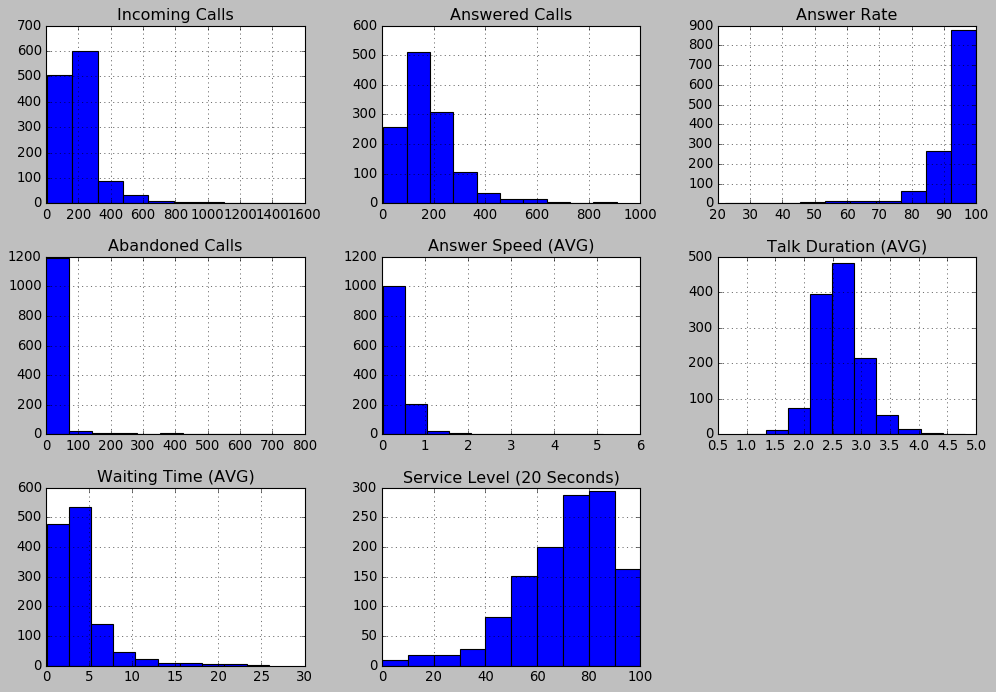

In [26]:
plt.style.use('classic')
data.hist(figsize=(15,10))

From the correlation graph, it is evident that service level goes up if call is answered immediatly and also if the call is not abandoned.

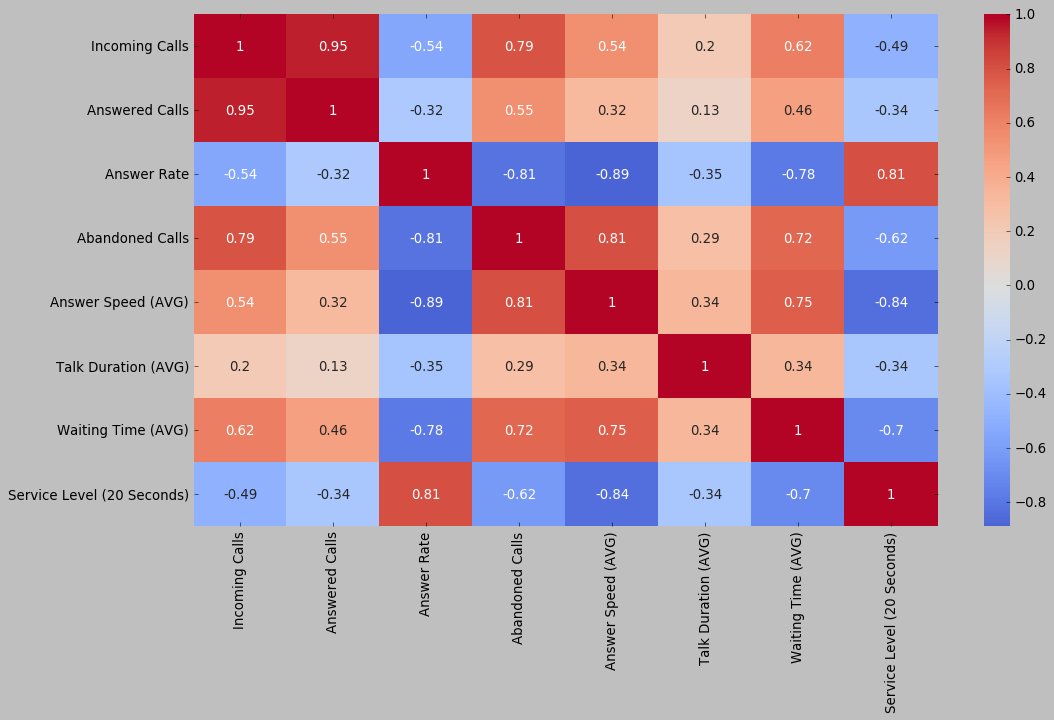

In [27]:
plt.figure(figsize=(15,8)) 
sns.color_palette("dark", as_cmap=True)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center = 0)

The below helps to clearly indicate that wait time, rather than call volume, is a key driver in abandonment in calls. While there is a relationship between these fields generally, overall, if there are a lot of calls answered quickly, there is less of an impact on abandonment. Additionally, there is a significant increase in abandonment when wait time exceeds

Text(0, 0.5, 'Average Wait Time')

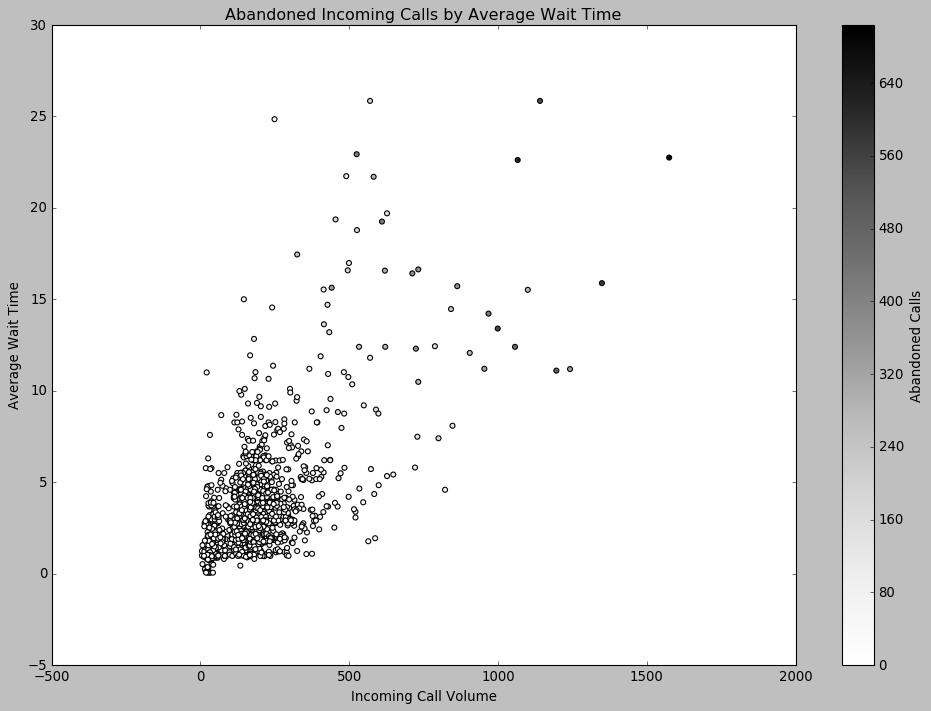

In [28]:
data.plot.scatter(x='Incoming Calls', y='Waiting Time (AVG)', c='Abandoned Calls', figsize=(15,10), title='Abandoned Incoming Calls by Average Wait Time')
plt.xlabel('Incoming Call Volume', size=12)
plt.ylabel('Average Wait Time', size=12)

Text(0, 0.5, 'Service Level (20 Seconds)')

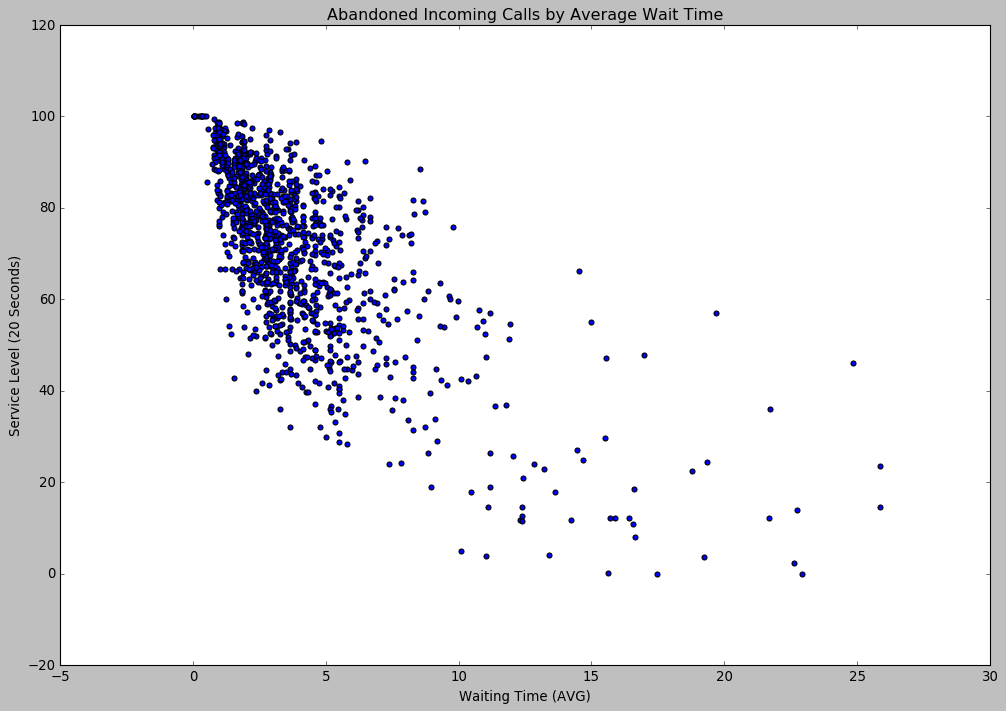

In [29]:
data.plot.scatter(x='Waiting Time (AVG)', y='Service Level (20 Seconds)', figsize=(15,10), title='Abandoned Incoming Calls by Average Wait Time', sharex=False)
plt.xlabel('Waiting Time (AVG)', size=12)
plt.ylabel('Service Level (20 Seconds)', size=12)